<h1> Case Study: Olympic Medals </h1>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

<img src = "http://nocmalta.org/wp-content/uploads/2013/11/olympic_rings.png" width = '300px' height = '300px'></a>
As a person who loves to watch sports, I am always excited if an athlete or a team wins the competition. Today, I will be analyzing <b>Olympic medals awarded from 1896 to 2008</b>.

In [6]:
# Import Olympic games held between 1896 and 2008
olympic = pd.read_csv('https://assets.datacamp.com/production/repositories/502/datasets/bf22326ecc9171f68796ad805a7c1135288120b6/all_medalists.csv')
olympic.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


<h3> Counting a total Number of Medals </h3>
First, we will filter the data by US athletes who received medals.
Next, we will group the data by Edition and finally calculate the total number of medals awarded to the United States.

In [7]:
usa_edition_grouped = olympic.loc[olympic.NOC == 'USA'].groupby('Edition')
pd.DataFrame(usa_edition_grouped['Medal'].count())

,Medal
Edition,
1896,20
1900,55
1904,394
1908,63
1912,101
1920,193
1924,198
1928,84
1932,181


It seems that a number of medals awarded to the USA fluctuated throughout numerous Olympic games. However,the USA began to collect more than 200 medals consistently starting at <i> 1992</i>. 
Alsom, it is noticeable that there were no Olympic Games in <i>1916, 1940 and 1944</i>; this period was during <b>World War I</b> and <b>World War II</b>.

Next, we will check the top 15 countries in the world that collected the most medals.

In [8]:
country_names = olympic['NOC']
medal_counts = country_names.value_counts()
pd.DataFrame(medal_counts.head(15))

,NOC
USA,4335
URS,2049
GBR,1594
FRA,1314
ITA,1228
GER,1211
AUS,1075
HUN,1053
SWE,1021
GDR,825


From the data, the United States collected the most medals with <b>4335 medals</b>, USSR coming second with <b>2049 medals</b>. We can infer from the data that USSR had an immense ability to collect medals from the Olympics.

Next, we will group medals for each country by Gold, Silver, and Bronze. We will be using a pivot table method.

In [9]:
counted = olympic.pivot_table(index='NOC', columns='Medal', values='Athlete', aggfunc='count')
counted['totals'] = counted.sum(axis='columns')  # New column totals
counted = counted.sort_values('totals', ascending=False)  # Sort the data by Totals
counted.head(15)

Medal,Bronze,Gold,Silver,totals
NOC,,,,
USA,1052.0,2088.0,1195.0,4335.0
URS,584.0,838.0,627.0,2049.0
GBR,505.0,498.0,591.0,1594.0
FRA,475.0,378.0,461.0,1314.0
ITA,374.0,460.0,394.0,1228.0
GER,454.0,407.0,350.0,1211.0
AUS,413.0,293.0,369.0,1075.0
HUN,345.0,400.0,308.0,1053.0
SWE,325.0,347.0,349.0,1021.0


<h3> Gender vs Event_Gender </h3>

From the above, we can notice that Gender and Event_Gender have similar meaning but different acronyms.

In [14]:
medals_by_gender = olympic.groupby(['Event_gender','Gender'])
medal_count_by_gender = medals_by_gender.count()
medal_count_by_gender

City  Edition  Sport  Discipline  Athlete    NOC  Event  \
Event_gender Gender                                                             
M            Men     20067    20067  20067       20067    20067  20067  20067   
W            Men         1        1      1           1        1      1      1   
             Women    7277     7277   7277        7277     7277   7277   7277   
X            Men      1653     1653   1653        1653     1653   1653   1653   
             Women     218      218    218         218      218    218    218   

                     Medal  
Event_gender Gender         
M            Men     20067  
W            Men         1  
             Women    7277  
X            Men      1653  
             Women     218

Notice that there is one data such that Event_gender and Gender does not match. we will check this person.' 

In [16]:
sus = (olympic.Event_gender == 'W') & (olympic.Gender == 'Men')
suspect = olympic[sus]
suspect

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
23675,Sydney,2000,Athletics,Athletics,"CHEPCHUMBA, Joyce",KEN,Men,marathon,W,Bronze


There is a data error such that Joyce's gender is Female but somehow the data misinterpreted her gender as Male.

<h3> Number of Distinct Sports Countries won </h3>

We now will differentiate unique sports each country won medals.
Also, we will display top 15 countries that won the most medals with unique sports.

In [20]:
country_grouped = olympic.groupby('NOC')
Nsports = country_grouped['Sport'].nunique()
Nsports = Nsports.sort_values(ascending=False)
pd.DataFrame(Nsports.head(15))

,Sport
NOC,
USA,34
GBR,31
FRA,28
GER,26
CHN,24
AUS,22
ESP,22
CAN,22
SWE,21


On the previous result, USSR was on top 2 list. However, now it is not even in top 5.
Hence, we are going to compare USA and USSR medal collecting competition between 1952 and 1988.

In [24]:
during_cold_war = (olympic.Edition >= 1952) & (olympic.Edition <= 1988)
is_usa_urs = olympic.NOC.isin(['USA','URS'])
cold_war_medals = olympic.loc[during_cold_war & is_usa_urs]
country_grouped = cold_war_medals.groupby('NOC')
Nsports = country_grouped['Sport'].nunique().sort_values(ascending=False)
pd.DataFrame(Nsports)

,Sport
NOC,
URS,21
USA,20


Surprisingly, during the Cold War Period, USSR performed better than USA in terms of winning medals.

<h3>Visualize the USA's Progress of Winning Medals</h3>

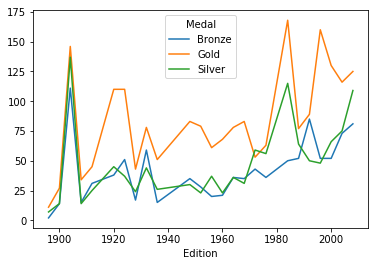

In [30]:
usa = olympic[olympic['NOC']=='USA']
usa_medals_by_year = usa.groupby(['Edition','Medal'])['Athlete'].count()
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')  # Reshape the data by unstacking Medal
usa_medals_by_year.plot()
plt.show()

Using a line plot may not be a viable option to differentiate medals that the USA won. We may get better visualization with an area plot.
Moreover, the categorical order of medals is incorrect and should be Bronze < Silver < Gold.
We will fix these two problems.

In [33]:
olympic.Medal = pd.Categorical(values=olympic.Medal, categories=['Bronze','Silver','Gold'], ordered=True)
olympic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29216 entries, 0 to 29215
Data columns (total 10 columns):
City            29216 non-null object
Edition         29216 non-null int64
Sport           29216 non-null object
Discipline      29216 non-null object
Athlete         29216 non-null object
NOC             29216 non-null object
Gender          29216 non-null object
Event           29216 non-null object
Event_gender    29216 non-null object
Medal           29216 non-null category
dtypes: category(1), int64(1), object(8)
memory usage: 2.0+ MB


We successfully converted the Medal datatype from object to the ordered category.

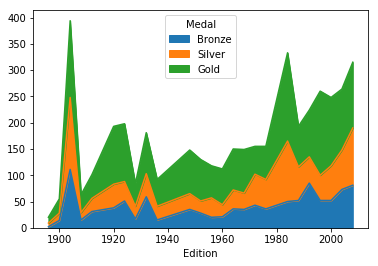

In [35]:
usa = olympic[olympic.NOC == 'USA']
usa_medals_by_year = usa.groupby(['Edition', 'Medal'])['Athlete'].count()
usa_medals_by_year = usa_medals_by_year.unstack(level='Medal')
usa_medals_by_year.plot.area()
plt.show()

Much better! By visualizing the plot, it seems that there were significant spikes in a number of gold medals the USA won around 1900 and 1980.